### Import dataset of Iris

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris = sklearn.datasets.load_iris()

In [47]:
X = iris.data[:,:2]
y = (iris.target != 0) * 1

In [48]:
import matplotlib.cm
print(matplotlib.cm.cmap_d.keys())

KeysView(<matplotlib.cm._DeprecatedCmapDictWrapper object at 0x7f8696b71d60>)


### Let's plot it

In [49]:
print(X[y==1][:,0])
print(X[y==0][:,1])

[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3
 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6
 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9
 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]


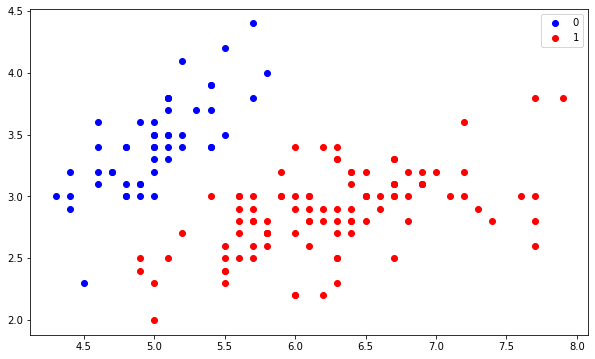

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

### Let's create Logistic Regression Class 


In [51]:
class LogisticRegression:
    def __init__(self, lr=0.01,num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X), axis=1)
    
    #our hypothesis takes as theta sigmoid function
    def __sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    #let's define loss function (specific for logistic regression)
    def __loss(self, h,y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
            
        #initialize weights
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.theta -= self.lr*gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
                
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [52]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [53]:
%time model.fit(X, y)

CPU times: user 11.1 s, sys: 36.8 ms, total: 11.1 s
Wall time: 11.1 s


In [54]:

preds = model.predict(X)
(preds == y).mean()

1.0

In [55]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

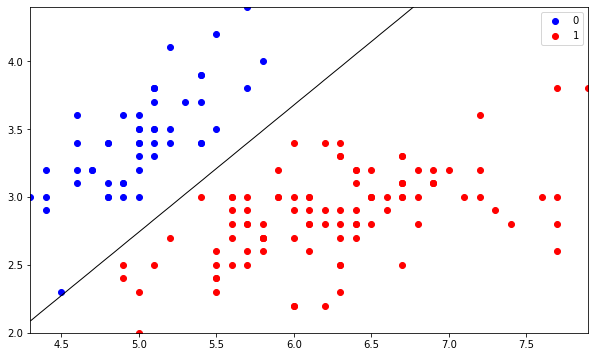

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

### sklearn implementation

In [57]:
from sklearn.linear_model import LogisticRegression


In [58]:
model = LogisticRegression(C=1e20)


In [59]:
%time model.fit(X, y)


CPU times: user 11.7 ms, sys: 2.34 ms, total: 14 ms
Wall time: 18.9 ms


LogisticRegression(C=1e+20)

In [60]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [61]:
model.intercept_, model.coef_


(array([-276.67727715]), array([[ 134.80324426, -147.37951668]]))